In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x = np.array([6.5,6.8,7.0,8.0,8.5,9.8,10.5,5.5,5.0])
y = np.array([180,195,210,235,280,350,400,170,160])

df = pd.DataFrame({'bmi':x, 'glu':y})
df

,bmi,glu
0,6.5,180
1,6.8,195
2,7.0,210
3,8.0,235
4,8.5,280
5,9.8,350
6,10.5,400
7,5.5,170
8,5.0,160


In [ ]:
X = df['bmi']
Y = df['glu']

#For ScikitLearn calculations for ex: LinReg, LogReg etc. X should be in 2-d & Y can be in 1-d or 2-d

In [ ]:
beta1 = np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
print(beta1)

#Beta1 is Slope

44.20003228931224


In [ ]:
beta0 = np.mean(Y) - beta1*np.mean(X)
print(beta0)

#Beta0 is Intercept

-89.76913141750077


**Write the Equation:**

Y = -89.769 + 44.20(X)

In [ ]:
y_pred = beta0 + beta1*X
y_pred

#These are the predicted Glucose Values, let's compare with actual values

0    197.531078
1    210.791088
2    219.631095
3    263.831127
4    285.931143
5    343.391185
6    374.331208
7    153.331046
8    131.231030
Name: bmi, dtype: float64

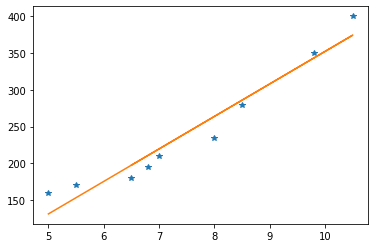

In [ ]:
plt.plot(X,Y, '*')
plt.plot(X,y_pred) 
plt.show()

# Orange line is the predicted values
# Blue points are actual values

In [ ]:
#SSE

(np.sum((Y-y_pred)**2))

3323.9384888601876

In [ ]:
#MSE

(np.sum((Y-y_pred)**2)) / len(X)

369.3264987622431

In [ ]:
#RMSE

np.sqrt((np.sum((Y-y_pred)**2)) / len(X))

19.217869256560235

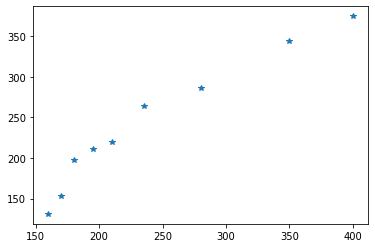

In [ ]:
plt.plot(Y,y_pred,'*')
plt.show()

In [ ]:
#Correlation Coefficient: Measures the strength of relationship between relative movement of two variables

r = np.corrcoef(Y,y_pred)
print(r)

# How much Correlation between the predicted values and the actual values 

[[1.         0.97046024]
 [0.97046024 1.        ]]


In [ ]:
# R2 can be calculated by simply squaring the correlation coefficient. R2 is Coefficient of determination. 

r2 = r**2
r2

array([[1.        , 0.94179308],
       [0.94179308, 1.        ]])

**Using the built-in functions**

In [ ]:
X = df['bmi']
Y = df['glu']

LR = LinearRegression()

LR.fit(X,Y)

# ERROR IS LEFT INTENTIONALLY: 
# This case X is one-dimensional and scikit learn will throw as error saying 2D array is expected, 
# because the data in X is treated as pandas series so simply add an extra [] to fix it

ValueError: ignored

In [ ]:
X = df[['bmi']]
Y = df['glu']

In [ ]:
LR = LinearRegression()

LR.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Coeffcient = Slope

LR.coef_

array([44.20003229])

In [ ]:
#Intercept

LR.intercept_

-89.76913141750072

In [ ]:
#Predict: Answers match what we have written in Y-Predict

LR.predict(X)

array([197.53107846, 210.79108815, 219.63109461, 263.8311269 ,
       285.93114304, 343.39118502, 374.33120762, 153.33104617,
       131.23103003])

In [ ]:
#R2

LR.score(X,Y)

0.9417930802612283

###**Levene Test**

We are using the Levene Test to check if BMI is a significant variable to predict Glucose. Since, both of the them continuous numerical variables we will comparing the variance of these variables. Levene Test is done to check if the variance of glucose = variance of bmi. 

If the p-value is less than 0.05, we can conclude that the variance of bmi and glucose are not same and bmi is a good variable to predict glucose. 


H0: Var(glu) = Var(bmi)

H1: Var(glu) != Var(bmi)

Inorder to use bmi to properly predict glucose the variance should not be equal each other. That is how we determine if it is a good independent variable to predict dependent variable.

In [ ]:
from scipy.stats import levene

In [ ]:
levene(X,Y)

# ERROR LEFT INTENTIONALLY:
#  For Levene test samples must be in one-dimensional error, simply remove the double [square bracket to single square bracket and run it]

ValueError: ignored

In [ ]:
X = df['bmi'] #Single square brackets for 1D data 
Y = df['glu']

In [ ]:
levene(X,Y)

LeveneResult(statistic=8.412133800635052, pvalue=0.010433035669625036)


 **Interpreting the results:**

P-value (0.010) < Alpha (0.05), We reject the null hypothesis. Meaning: Variance for glucose and Variance of BMI are not the same. P-value of 0.01 means that the probability that null hypothesis is true around 1% (0.0104), which is obviously below our threshold of alpha 5% (0.05), which represents the amount of error we are ready to accept.   


#**Classfication:**

Now let's make this as a classification problem changing the dependent variable from Glucose to (Diabetic or Healthy)


In [ ]:
x = np.array([6.5,6.8,7.0,8.0,8.5,9.8,10.5,5.5,5.0])
y = np.array([0,0,0,1,1,1,1,0,0])

df = pd.DataFrame({'bmi':x, 'glu':y})
df

,bmi,glu
0,6.5,0
1,6.8,0
2,7.0,0
3,8.0,1
4,8.5,1
5,9.8,1
6,10.5,1
7,5.5,0
8,5.0,0


In [ ]:
X = df['bmi']
Y = df['glu']

Two-sample T-Test

Glucose (glu) is the dependent variable in this classification problem which only has 2 discrete values. BMI has continuous numerical values so will be using two-sample T-test. 

In [ ]:
from scipy.stats import ttest_ind

H0: Mean of bmi in class 0 = Mean of bmi in class 1

H1: Mean of bmi in class 0 != Mean of bmi in class 1

Test: 2-Sample T-Test

In [ ]:
gg = df.groupby('glu')
g0 = gg.get_group(0)
g1 = gg.get_group(1)

In [ ]:
ttest_ind(g0['glu'], g1['glu'])

Ttest_indResult(statistic=-inf, pvalue=0.0)

P-value (0.0) < alpha (0.05), we can reject the null hypothesis and claim that mean of class 0 is not as mean of class 1. BMI is a good indicator to predict whether or not the individual has diabetes.

In [ ]:
beta1 = np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
print(beta1)

#Beta1 is Slope

0.245398773006135


In [ ]:
beta0 = np.mean(Y) - beta1*np.mean(X)
print(beta0)

#Beta0 is Intercept

-1.3987730061349692


In [ ]:
y_pred = 1/(1+np.exp(-beta0 - beta1*X))
print(y_pred)

0    0.548923
1    0.567078
2    0.579085
3    0.637474
4    0.665325
5    0.732263
6    0.764573
7    0.487733
8    0.457161
Name: bmi, dtype: float64


In [ ]:
y_pred_prob = 1/(1+np.exp(-y_pred))
y_pred_prob

#Probablities 

0    0.633886
1    0.638089
2    0.640857
3    0.654182
4    0.660456
5    0.675302
6    0.682346
7    0.619572
8    0.612340
Name: bmi, dtype: float64

In [ ]:
np.exp(y_pred)/(1+np.exp(y_pred))

0    0.633886
1    0.638089
2    0.640857
3    0.654182
4    0.660456
5    0.675302
6    0.682346
7    0.619572
8    0.612340
Name: bmi, dtype: float64

**Threshold**

The threshold is determined by the algorithm which depends on probability calculated. For this example let's simply take the mean as threshold. 

We are simply writing a for loop stating that if the probabiliy is greater than mean value it will classify as 1 if not it will classify as 0

In [ ]:
glu_class=[]
for val in y_pred:
  if (val > np.mean(y_pred)):
    glu_class.append(1)

  else:
    glu_class.append(0)

print(glu_class)

[0, 0, 0, 1, 1, 1, 1, 0, 0]


In [ ]:
Y

0    0
1    0
2    0
3    1
4    1
5    1
6    1
7    0
8    0
Name: glu, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df[['bmi']]
Y = df['glu']

In [ ]:
LogR = LogisticRegression()
LogR.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LogR.predict(X)

array([0, 0, 0, 1, 1, 1, 1, 0, 0])

These are predicted values

**Logisitic Algorithm workings**

* .fit (X,Y): The algorithm will calculate B0 and B1 and it will apply the formula and calculate the probabilities 
* .predict(X): Will fix a threshold based on the calculated probabilities and truncate the probabilty to classes based on that particular threshold